# Graph Datasets

In [1]:
import numpy as np
from datasets.random_graphs import ErdosRenyiDataset

In [2]:
rg = ErdosRenyiDataset(
    num_nodes=7,
    num_samples=500,
    er_prob=0.5,
    train_split=0.8
)


Erdos-Renyi Dataset (k=7, p=0.5): 500 graphs
Train count: 400
Test count: 100


In [3]:
train_ds, test_ds = rg.get_train_data(), rg.get_test_data()
print(f"Train dataset size: {len(train_ds[0])}")
print(f"Test dataset size: {len(test_ds[0])}")

Train dataset size: 400
Test dataset size: 100


In [4]:
print(f"Train dataset: {train_ds[0][0]}")

Train dataset: [0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1.]


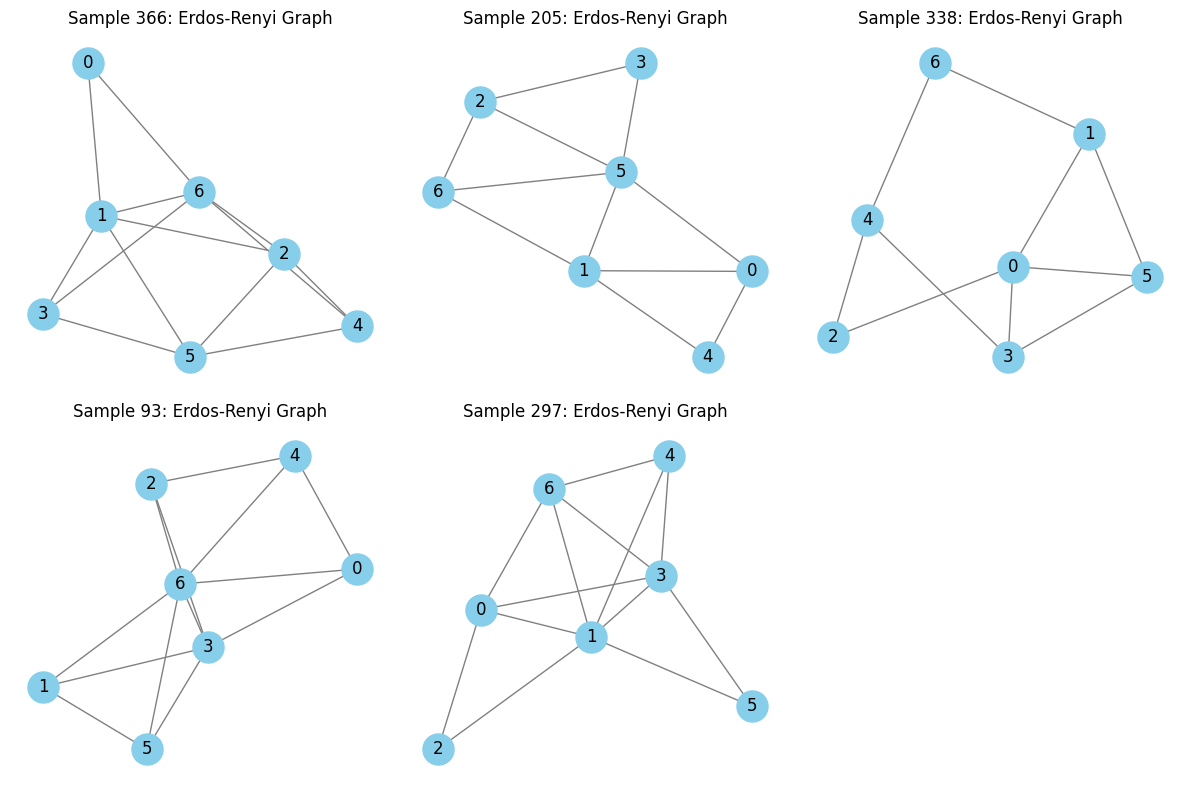

In [5]:
rg.plot_random_samples()

In [6]:
from datasets.bipartites import BipartiteGraphDataset 
bipartite_ds = BipartiteGraphDataset(
    num_samples = 500,
    num_vertices = 14,
    ratio_bipartite = 0.8,
    edge_prob = 0.2,
    ensure_connected = True,
    seed = 42,
)
print(f"Bipartite dataset size: {len(bipartite_ds[0])}")
print(f"Bipartite dataset: {bipartite_ds[0][0]}")


Bipartite Dataset (k=14, p=0.2, connected=True):
Target samples: 500, Generated samples: 500
Bipartite: 400, Non-Bipartite: 100
Target Ratio (Bipartite): 0.800, Actual Ratio: 0.800
Bipartite dataset size: 2
Bipartite dataset: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


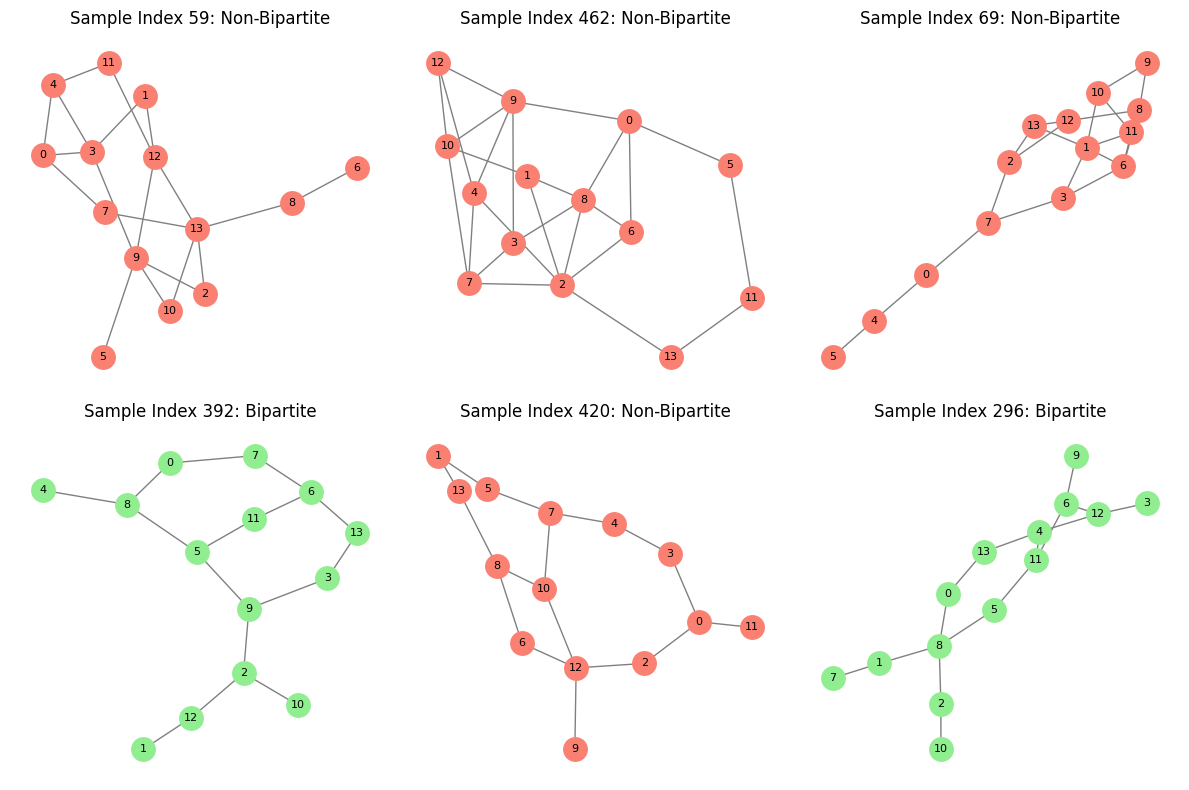

In [7]:
bipartite_ds.plot_random_samples()

# Bipartite BAE